# Particle swarm optimization for the `ackley` function

In [1]:
# Import dependencies.
import sympy as sp
import numpy as np
import matplotlib as mpl
import ipywidgets as widgets
import modules.oiplib as oiplib

In [2]:
# Configure plotting.
sp.interactive.init_printing(use_unicode=False, wrap_line=False, no_global=True)
%matplotlib notebook

In [3]:
# Define symbolic variables of the ackley function.
#x, y = sp.symbols("x y")

# Define the function.
f, x, y = oiplib.ackley();
# display(f)

In [4]:
size = 5

In [5]:
# Define a plot range and plot the function with sympy: 
yMin, yMax, xMin, xMax = -size, size, -size, size
plot = sp.plotting.plot3d(f, (x, xMin, xMax), (y, yMin, yMax));

<IPython.core.display.Javascript object>

In [6]:
swarm = oiplib.ParticleSwarm(oiplib.ackley_function, (xMin, yMin), (xMax, yMax))

In [7]:
swarm.run()

In [8]:
fig2 = mpl.pyplot.figure(2)
ax = fig2.add_subplot(111, projection='3d')

def plot_func(iteration):
    xp = []
    yp = []
    zp = []
    for particle in swarm.particles:
        xp.append(particle.coordinatesX[iteration])
        yp.append(particle.coordinatesY[iteration])
        zp.append(particle.coordinatesZ[iteration])
        
    span = 5
    stepSize = 0.1
        
    xa = np.arange(-span, span+stepSize, stepSize)
    ya = np.arange(-span, span+stepSize, stepSize)
    xa, ya = np.meshgrid(xa, ya)
    za = np.zeros(xa.shape)
    
    it = np.nditer(za, flags=['multi_index'], op_flags=['readwrite']) 
    while not it.finished:
        i, j = it.multi_index
        za[i, j] = swarm.func(xa[i, j], ya[i, j])
        it.iternext()
    
    ax.cla()
    
    ax.set_xbound(-size, size)
    ax.set_ybound(-size, size)
    ax.set_zbound(0, size*3)
    ax.set_autoscale_on(False)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    surf = ax.plot_surface(xa, ya, za, color=(0, 0, 0, 0.2), rcount=span*2+1, ccount=span*2+1)
    scatter = ax.scatter(xp, yp, zp, c=zp, cmap="RdYlGn_r")
    
widgets.interact(plot_func, iteration=widgets.IntSlider(value=0, min=0, max=len(swarm.particles[0].coordinatesZ)-1, step=1), continuous_update=False);

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=0, description='iteration', max=83), Output()), _dom_classes=('widget-in…

<IPython.core.display.Javascript object>


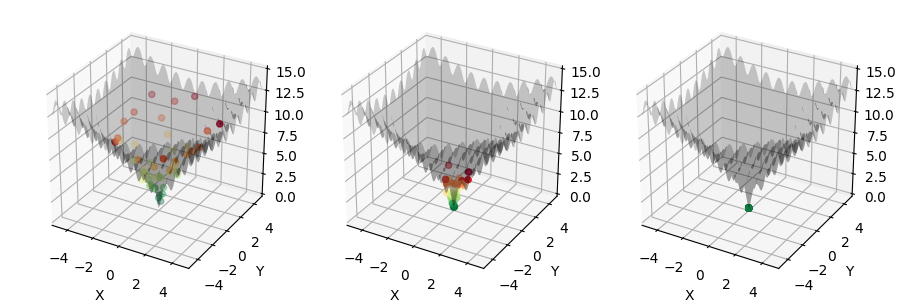

In [9]:
fig3 = mpl.pyplot.figure(3, figsize=(9, 9/3))
ax1 = fig3.add_subplot(1, 3, 1, projection='3d')
ax2 = fig3.add_subplot(1, 3, 2, projection='3d')
ax3 = fig3.add_subplot(1, 3, 3, projection='3d')

def subplot_func(axes, iteration):
    xp = []
    yp = []
    zp = []
    for particle in swarm.particles:
        xp.append(particle.coordinatesX[iteration])
        yp.append(particle.coordinatesY[iteration])
        zp.append(particle.coordinatesZ[iteration])
        
    span = 5
    stepSize = 0.1
        
    xa = np.arange(-span, span+stepSize, stepSize)
    ya = np.arange(-span, span+stepSize, stepSize)
    xa, ya = np.meshgrid(xa, ya)
    za = np.zeros(xa.shape)
    
    it = np.nditer(za, flags=['multi_index'], op_flags=['readwrite']) 
    while not it.finished:
        i, j = it.multi_index
        za[i, j] = swarm.func(xa[i, j], ya[i, j])
        it.iternext()
    
    axes.cla()
    
    axes.set_xbound(-size, size)
    axes.set_ybound(-size, size)
    axes.set_zbound(0, size*3)
    axes.set_autoscale_on(False)
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    
    surf = axes.plot_surface(xa, ya, za, color=(0, 0, 0, 0.2), rcount=span*2+1, ccount=span*2+1)
    scatter = axes.scatter(xp, yp, zp, c=zp, cmap="RdYlGn_r")
    
subplot_func(ax1, 0)
subplot_func(ax2, 10)
subplot_func(ax3, len(swarm.particles[0].coordinatesZ) - 1)

mpl.pyplot.tight_layout()